In [ ]:
import investpy
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates


In [ ]:
#import finplot as fplt

In [3]:
t = datetime.datetime.now()
#t.strftime('%d/%m/%Y')
t

datetime.datetime(2021, 6, 20, 13, 5, 15, 709210)

In [ ]:
search_result = investpy.search_quotes(text='gold', products=['commodities'],
                                       countries=['united states'])
print(search_result[0])

              Open    High     Low   Close     Volume  Change Pct
Date                                                             
2021-06-14  127.70  130.48  127.10  130.48   96906488        2.46
2021-06-15  130.07  130.59  129.41  129.64   62746332       -0.64
2021-06-16  130.26  130.89  128.49  130.15   91815024        0.39
2021-06-17  129.94  132.54  129.66  131.79   96721672        1.26
2021-06-18  130.71  131.51  130.24  130.46  108953000       -1.01
DatetimeIndex(['2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18'],
              dtype='datetime64[ns]', name='Date', freq=None)


AttributeError: 'function' object has no attribute 'plot'

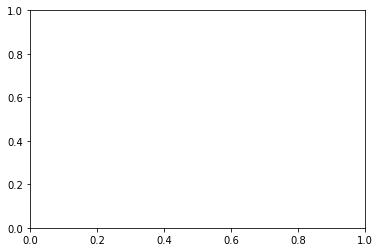

In [24]:
# information = search_result[1].retrieve_information()
# print(information)
#recent_data = search_result[1].retrieve_recent_data()
#print(recent_data.head())
t2=datetime.datetime.now()
#t1= datetime.datetime(t2.year, t2.month, t2.day-7, 0, 0)
t1 = (datetime.datetime.timestamp(t2)-86400*7)
t1 = datetime.datetime.fromtimestamp(t1)
df = search_result[0].retrieve_historical_data(
                                        from_date=t1.strftime('%d/%m/%Y'),
                                        to_date=t2.strftime('%d/%m/%Y'))
print(df.head())
a =df.iloc[[-1]].iloc[0]
print(df.axes[0])
#print(a.array)


df['date'] = df.index
# gca stands for 'get current axis'
ax = plt.gca()
df.head.plot(kind='line',x='date',y='Open', color='red', ax=ax)
#style1 = {'grid.linewidth': '0.8', 'grid.alpha':'0.5', 'grid.linestyle': 'solid', 'grid.color':     'b6b7b0'}
plt.style.use('classic')
#plt.style.use(style1)
#plt.grid()
plt.grid(color='grey', linestyle='-', linewidth=2)
plt.show()
df.head()

In [21]:
default_currency = search_result.retrieve_currency()
print(default_currency)

USD


In [56]:
search_result = investpy.get_stocks(country='united states')
print(search_result.iloc[range(0,3)])
part1 = search_result.iloc[range(0,3)]
print(part1)

         country            name               full_name          isin  \
0  united states          Boeing               Boeing Co  US0970231058   
1  united states  General Motors  General Motors Company  US37045V1008   
2  united states         Chevron            Chevron Corp  US1667641005   

  currency symbol  
0      USD     BA  
1      USD     GM  
2      USD    CVX  


In [43]:
search_result = investpy.get_stock_countries()
print(search_result)

['argentina', 'brazil', 'canada', 'chile', 'colombia', 'costa rica', 'jamaica', 'mexico', 'peru', 'united states', 'venezuela', 'austria', 'belgium', 'bosnia', 'bulgaria', 'croatia', 'cyprus', 'czech republic', 'denmark', 'finland', 'france', 'germany', 'greece', 'hungary', 'iceland', 'ireland', 'italy', 'luxembourg', 'malta', 'montenegro', 'netherlands', 'norway', 'poland', 'portugal', 'romania', 'russia', 'serbia', 'slovakia', 'slovenia', 'spain', 'sweden', 'switzerland', 'turkey', 'ukraine', 'united kingdom', 'australia', 'bangladesh', 'china', 'hong kong', 'india', 'indonesia', 'japan', 'kazakhstan', 'malaysia', 'mongolia', 'new zealand', 'pakistan', 'philippines', 'singapore', 'south korea', 'sri lanka', 'taiwan', 'thailand', 'vietnam', 'bahrain', 'egypt', 'iraq', 'israel', 'jordan', 'kuwait', 'lebanon', 'oman', 'palestine', 'qatar', 'saudi arabia', 'dubai', 'botswana', 'ivory coast', 'kenya', 'malawi', 'mauritius', 'morocco', 'namibia', 'nigeria', 'rwanda', 'south africa', 'tanza

In [ ]:
search_result = investpy.search_quotes(text='s&p', products=['funds'],
                                       countries=['united states'], n_results=3)
print(search_result[0])
print(search_result[1])
print(search_result[2])

              Open    High     Low   Close     Volume  Change Pct       Date
Date                                                                        
2021-06-14  127.70  130.48  127.10  130.48   96906488        2.46 2021-06-14
2021-06-15  130.07  130.59  129.41  129.64   62746332       -0.64 2021-06-15
2021-06-16  130.26  130.89  128.49  130.15   91815024        0.39 2021-06-16
2021-06-17  129.94  132.54  129.66  131.79   96721672        1.26 2021-06-17
2021-06-18  130.71  131.51  130.24  130.46  108953000       -1.01 2021-06-18


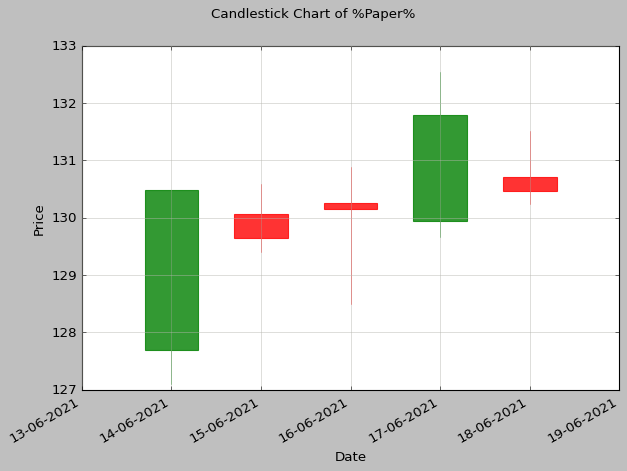

In [73]:
t2=datetime.datetime.now()
t1= datetime.datetime(t2.year, t2.month, t2.day-7, 0, 0)
df = search_result[0].retrieve_historical_data(
                                        from_date=t1.strftime('%d/%m/%Y'),
                                        to_date=t2.strftime('%d/%m/%Y'))
df['Date'] = df.index
print(df.head())
data = df
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Candlestick Chart of %Paper%')

#Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
plt.grid()
plt.show()

In [ ]:

#df = pd.read_csv("<data-path.csv>")
search_result = investpy.search_quotes(text='apple', products=['stocks'],
                                       countries=['united states'])
t2=datetime.datetime.now()
t1= datetime.datetime(t2.year, t2.month, t2.day-7, 0, 0)
df = search_result[0].retrieve_historical_data(
                                        from_date=t1.strftime('%d/%m/%Y'),
                                        to_date=t2.strftime('%d/%m/%Y'))
df['date'] = df.index
print(df.head())
# fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']])
# fplt.show()